In [1]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [12]:
train = pd.read_csv("C:/Users/haima/Desktop/Python_working/digit-recognizer/train.csv")
test = pd.read_csv("C:/Users/haima/Desktop/Python_working/digit-recognizer/test.csv")

y = train["label"]
x = train.drop(labels = ["label"], axis = 1) 


In [13]:
x = x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
y = to_categorical(y, num_classes=10)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y,test_size=0.1,shuffle = True)

In [15]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [16]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [18]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [19]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20,
                           verbose=2,  
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
 - 31s - loss: 0.8980 - accuracy: 0.7107 - val_loss: 0.1357 - val_accuracy: 0.9650
Epoch 2/20
 - 25s - loss: 0.3306 - accuracy: 0.9003 - val_loss: 0.1067 - val_accuracy: 0.9675
Epoch 3/20
 - 26s - loss: 0.2358 - accuracy: 0.9278 - val_loss: 0.0947 - val_accuracy: 0.9850
Epoch 4/20
 - 25s - loss: 0.2016 - accuracy: 0.9399 - val_loss: 0.0796 - val_accuracy: 0.9775
Epoch 5/20
 - 25s - loss: 0.1632 - accuracy: 0.9500 - val_loss: 0.0662 - val_accuracy: 0.9750
Epoch 6/20
 - 26s - loss: 0.1526 - accuracy: 0.9538 - val_loss: 0.0756 - val_accuracy: 0.9775
Epoch 7/20
 - 27s - loss: 0.1628 - accuracy: 0.9546 - val_loss: 0.0762 - val_accuracy: 0.9775
Epoch 8/20
 - 25s - loss: 0.1308 - accuracy: 0.9617 - val_loss: 0.0355 - val_accuracy: 0.9875
Epoch 9/20
 - 26s - loss: 0.1246 - accuracy: 0.9655 - val_loss: 0.0374 - val_accuracy: 0.9900
Epoch 10/20
 - 26s - loss: 0.1182 - accuracy: 0.9647 - val_loss: 0.0471 - val_accuracy: 0.9850
Epoch 11/20
 - 26s - loss: 0.1016 - accuracy: 0.9711 - val_

In [20]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0344, final accuracy: 0.9895


In [27]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

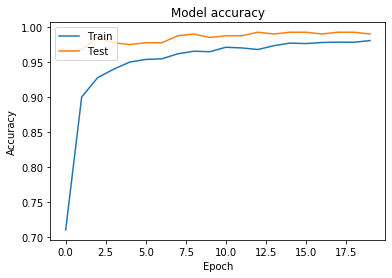

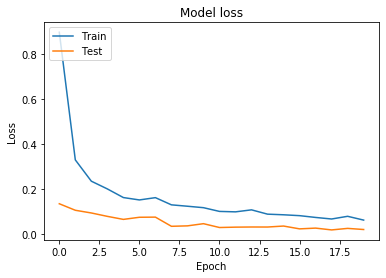

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[403   0   0   0   0   0   1   0   1   0]
 [  0 449   1   0   0   0   0   1   2   0]
 [  0   0 416   1   1   0   0   2   2   0]
 [  0   0   2 445   0   1   0   3   1   0]
 [  0   0   0   0 421   0   1   0   0   5]
 [  0   0   0   1   0 346   1   0   0   1]
 [  0   0   1   0   0   2 411   0   3   0]
 [  0   0   1   0   1   0   0 454   1   1]
 [  0   0   1   0   0   0   0   0 390   0]
 [  0   0   0   0   3   0   0   0   2 421]]


In [30]:
predictions = model.predict_classes(test, verbose=1)
pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
              "Label":predictions}).to_csv("submission_1.csv",
                                           index=False,
                                           header=True)

28000/28000 [==============================] - 22s 800us/step
